In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
header = ['buying','maint','doors','persons','lug_boot','safety','class']
cars= pd.read_csv('car.data.txt',header=None,names=header)

In [3]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Exploratory Data Analysis

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,4,more,med,low,unacc
freq,432,432,432,576,576,576,1210


** *We can say that all the features are 'object' type* - Categorical **

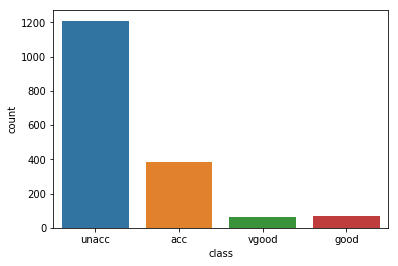

In [6]:
#plotting the class column

sns.countplot(cars['class'])

** Class showing if the cars are accessible within the range or not is the target class as described in the website **

In [7]:
# Counting the type of data in each column

for i in cars.columns:
    print(cars[i].value_counts())
    

low      432
high     432
med      432
vhigh    432
Name: buying, dtype: int64
low      432
high     432
med      432
vhigh    432
Name: maint, dtype: int64
4        432
5more    432
2        432
3        432
Name: doors, dtype: int64
more    576
4       576
2       576
Name: persons, dtype: int64
med      576
big      576
small    576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


**We can see from the above counting and figure that the distribution of our class is not uniform** 

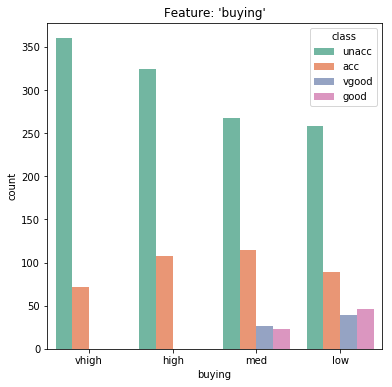

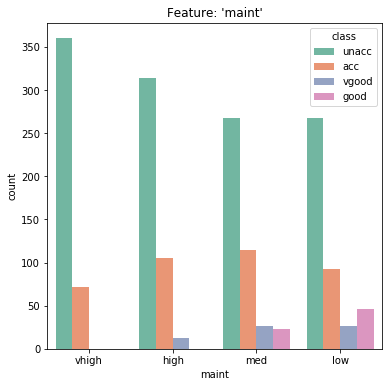

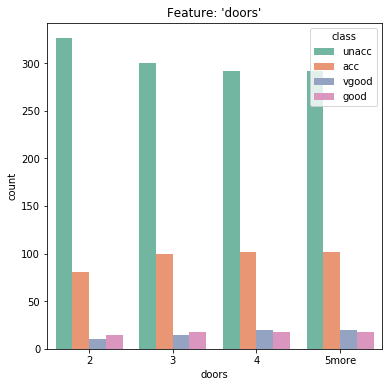

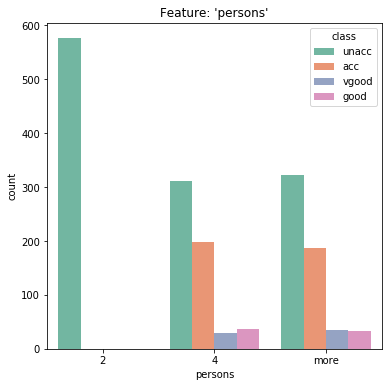

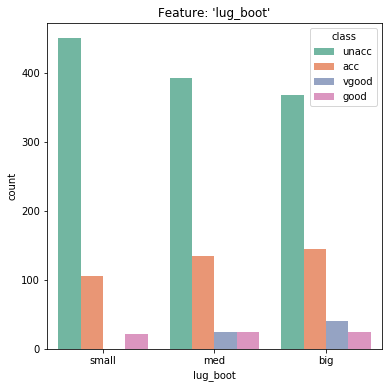

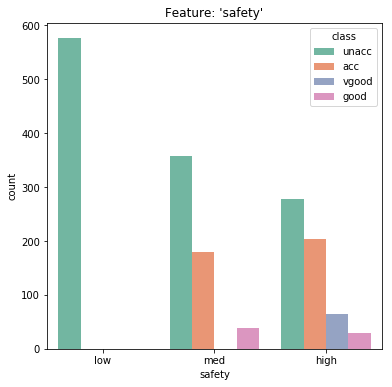

In [8]:
# Checking each feature distribution by its count
for i in cars.columns[:-1]:
    plt.figure(figsize=(6,6))
    plt.title("Feature: '%s'"%i)
    sns.countplot(cars[i],hue=cars['class'],palette="Set2")



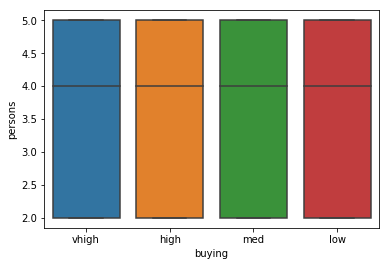

In [9]:
#converting the person feature values to integers 
cars['persons']=cars['persons'].map({'more' : 5, '2' : 2, '4' : 4})
sns.boxplot(x='buying',y='persons',data=cars)

**converting all the feature values to integers for modelling the data**

In [10]:
#using label encoder function

from sklearn.preprocessing import LabelEncoder

In [11]:
cars=cars.apply(LabelEncoder().fit_transform)

In [12]:
cars.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [13]:
for i in cars.columns:
    print(cars[i].value_counts())

3    432
2    432
1    432
0    432
Name: buying, dtype: int64
3    432
2    432
1    432
0    432
Name: maint, dtype: int64
3    432
2    432
1    432
0    432
Name: doors, dtype: int64
2    576
1    576
0    576
Name: persons, dtype: int64
2    576
1    576
0    576
Name: lug_boot, dtype: int64
2    576
1    576
0    576
Name: safety, dtype: int64
2    1210
0     384
1      69
3      65
Name: class, dtype: int64


<Figure size 720x720 with 0 Axes>

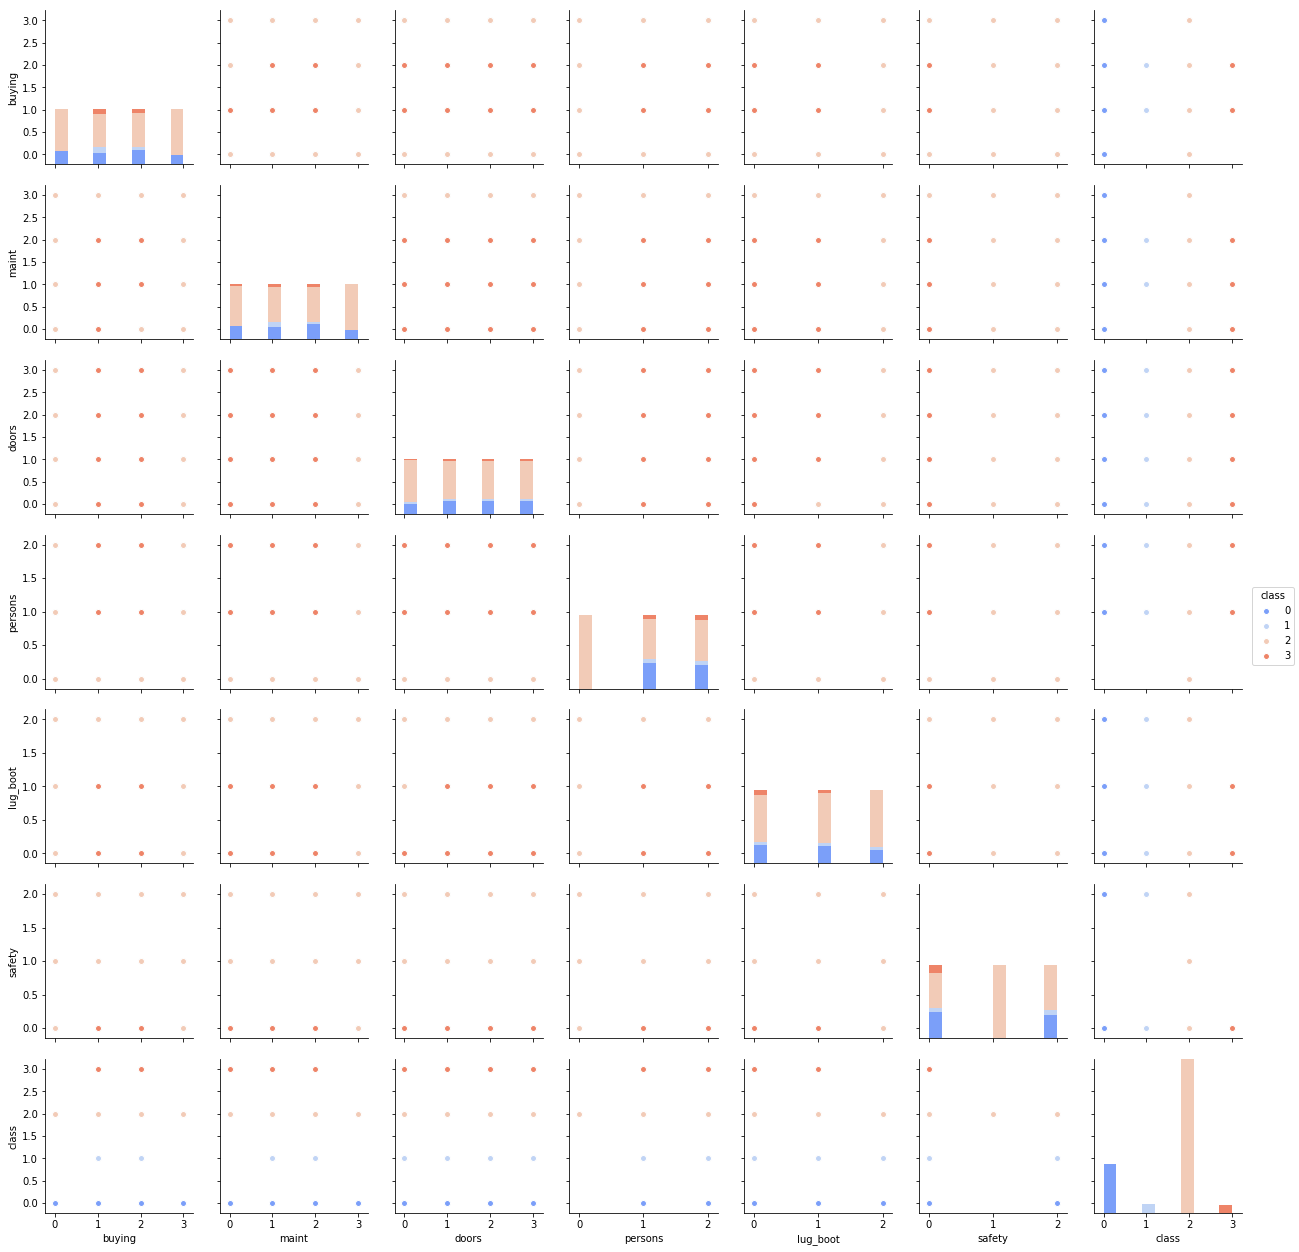

In [14]:
#to check the important features and relation with each other
plt.figure(figsize=(10,10))
sns.pairplot(cars,hue='class',palette='coolwarm')

** We can see that the scatter plot or histogram plot with each feature does not give much information.**

**Let us plot using the correlation function **

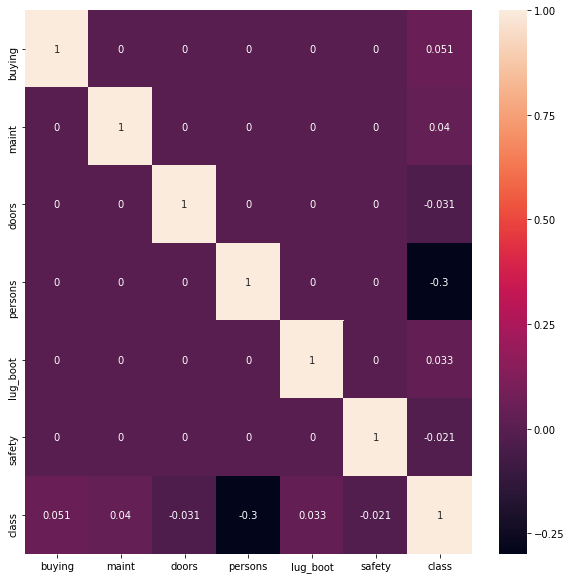

In [15]:
#applying correlation and heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cars.corr(),annot=True)

**from the correlation heat map we can see that no feature has much correlation with the other and 'persons' correlation is showing a weak relation to class compare to other features**

# Model Selection

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [17]:
#splitting the input features and target features to X and y respectively 
X=cars[cars.columns[:-1]]
y=cars['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [19]:
# Spot Check Algorithms
Clasifiers = []
Clasifiers.append(('LR', LogisticRegression()))
Clasifiers.append(('Knn', KNeighborsClassifier()))
Clasifiers.append(('rfc', RandomForestClassifier()))
# evaluate each model
accuracy = []
models = []
for model, clf in Clasifiers:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    models.append(model)
    accuracy.append(cv_results)
    print("%s: %f " % (model, cv_results.mean()))

LR: 0.692219 
Knn: 0.898853 
rfc: 0.929048 


## ** K Nearest Neighbour **

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predict_knn = knn.predict(X_test)
print("K=1")
print('accuracy: ',accuracy_score(y_test,predict_knn))
print('score: ', metrics.f1_score(y_test,predict_knn,average='macro'))



K=1
accuracy:  0.8021015761821366
score:  0.6239402971076038


In [21]:
print(classification_report(y_test,predict_knn))

             precision    recall  f1-score   support

          0       0.65      0.55      0.59       129
          1       0.33      0.50      0.40        20
          2       0.89      0.91      0.90       397
          3       0.60      0.60      0.60        25

avg / total       0.80      0.80      0.80       571



### Prediction and Evaluation

In [22]:
#code to plot the confusion matrix 
#(Taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

"""
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
#ploting the error predicted
ErrorRate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    ErrorRate.append(np.mean(predict_i != y_test))

Text(0,0.5,'Error Rate')

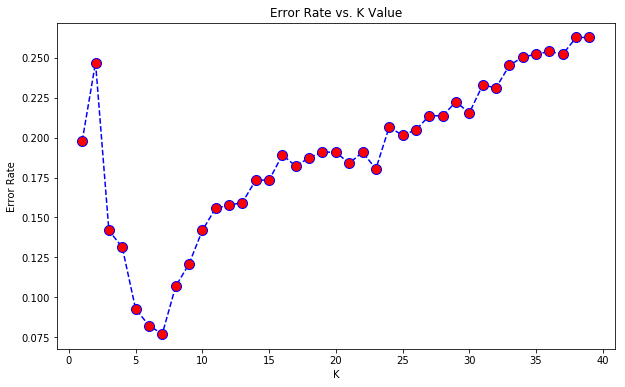

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),ErrorRate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

** From the above graph we can see that the nearest neighbour (5,6,7) the error rate is decreases but **
**after 7 the error rate starts hovering leading to decrease in accuracy**

### Changing the K value

In [25]:
knn_k = KNeighborsClassifier(n_neighbors=7)
knn_k.fit(X_train,y_train)
predict_knn_k = knn_k.predict(X_test)
print("K=7")
print('accuracy: ',accuracy_score(y_test,predict_knn_k))
print('score: ', metrics.f1_score(y_test,predict_knn_k,average='macro'))
print(classification_report(y_test,predict_knn_k))


K=7
accuracy:  0.9229422066549913
score:  0.8052439100635506
             precision    recall  f1-score   support

          0       0.87      0.81      0.84       129
          1       0.79      0.55      0.65        20
          2       0.95      0.99      0.97       397
          3       0.82      0.72      0.77        25

avg / total       0.92      0.92      0.92       571



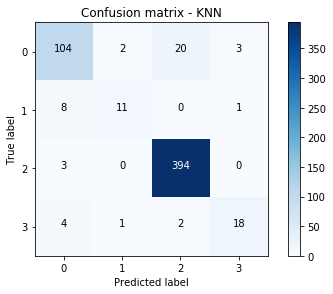

Recall: 57.89473684210526%


In [26]:
#Plotting confusion matrix
CnfMat_test = confusion_matrix(y_test, predict_knn_k)
classes = [0,1,2,3]
plt.figure()
plot_confusion_matrix(CnfMat_test , classes=classes, title='Confusion matrix - KNN')
plt.show()
print("Recall: {}%".format(100*CnfMat_test[1,1]/(CnfMat_test[1,0]+CnfMat_test[1,1])))

## Random Forest Classifier
**Since we can see that we have a class imbalance. As the unacess has more values than the other classes. RFC can be the appropriate model to test**

In [27]:
#provide the classifier with parameters to give the best one
Parameter_Grid= { 
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9],
                 'criterion':['gini','entropy']   
    
            }
rfc = RandomForestClassifier()

In [28]:
rfc_grid = GridSearchCV(rfc,Parameter_Grid,cv=10)

rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 5, 7, 9], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [29]:
print(rfc_grid.best_estimator_)
rfc_grid.best_score_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


0.9498703543647364

**With the above features and estimators of rfc we achieved a 95% accuracy, which is an improvement from KNN**

### Prediction and Evaluation

In [30]:
predict_rfc = rfc_grid.predict(X_test)
print(classification_report(y_test,predict_rfc))

             precision    recall  f1-score   support

          0       0.90      0.88      0.89       129
          1       0.65      0.65      0.65        20
          2       0.98      0.99      0.99       397
          3       0.85      0.88      0.86        25

avg / total       0.95      0.95      0.95       571



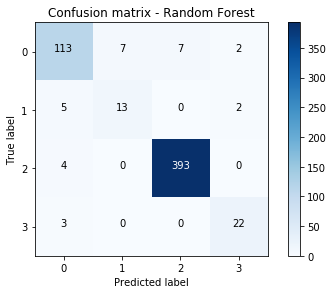

Recall: 72.22222222222223%


In [31]:
#plotting confusion matrix
CnfMat_test = confusion_matrix(y_test, predict_rfc)
classes = [0,1,2,3]
plt.figure()
plot_confusion_matrix(CnfMat_test , classes=classes, title='Confusion matrix - Random Forest')
plt.show()
print("Recall: {}%".format(100*CnfMat_test[1,1]/(CnfMat_test[1,0]+CnfMat_test[1,1])))

### Feature Selection

In [32]:
#selection the important features
rfc.fit(X_train,y_train)
print(X.columns)
rfc.feature_importances_

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


array([0.20175183, 0.15629453, 0.0640371 , 0.20923071, 0.08324387,
       0.28544196])

** From the above feature importance we can see that "doors" have the least importance.**

** Drop the feature and evaluate the model.**

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['buying', 'maint', 'persons', 'lug_boot', 'safety']],
    y, test_size=0.3, random_state=42)

In [34]:
rfc.fit(X_train1,y_train1)
predict_rfc_new = rfc.predict(X_test1)
print(classification_report(y_test1,predict_rfc_new))

             precision    recall  f1-score   support

          0       0.89      0.84      0.86       118
          1       0.54      0.79      0.64        19
          2       0.98      0.97      0.98       358
          3       0.79      0.79      0.79        24

avg / total       0.94      0.93      0.93       519



**We can see that by dropping a feature the accuracy and score drops. Since our features are less (#6) this method will not help.**

### SMOTE Analysis

In [35]:
#testing the accuracy after removing the class inbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [36]:
from imblearn.over_sampling import SMOTE

In [37]:

sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

np.bincount(y_train_res)

array([847, 847, 847, 847], dtype=int64)

In [43]:
rfc_smote = RandomForestClassifier(n_estimators=25, random_state=2)
rfc_smote.fit(X_train_res, y_train_res)
predict_smote= rfc_smote.predict(X_test)

### Prediction and Evaluation

In [44]:
from sklearn.metrics import recall_score
print ('\nTest Results')
print (rfc_smote.score(X_test, y_test))
print (accuracy_score(y_test, rfc_smote.predict(X_test)))
print(classification_report(y_test,rfc_smote.predict(X_test)))


Test Results
0.9749518304431599
0.9749518304431599
             precision    recall  f1-score   support

          0       0.94      0.95      0.94       115
          1       0.83      0.96      0.89        25
          2       1.00      0.99      0.99       363
          3       1.00      0.94      0.97        16

avg / total       0.98      0.97      0.98       519



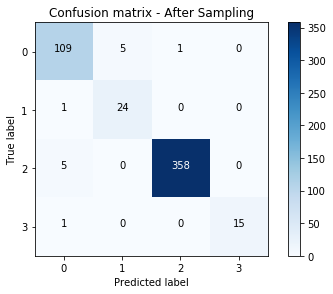

Recall: 96.0%


In [45]:
#plotting the confusion matrix
CnfMat_test = confusion_matrix(y_test, predict_smote)
classes = [0,1,2,3]
plt.figure()
plot_confusion_matrix(CnfMat_test , classes=classes, title='Confusion matrix - After Sampling')
plt.show()
print("Recall: {}%".format(100*CnfMat_test[1,1]/(CnfMat_test[1,0]+CnfMat_test[1,1])))

Text(0,0.5,'Accuracy')

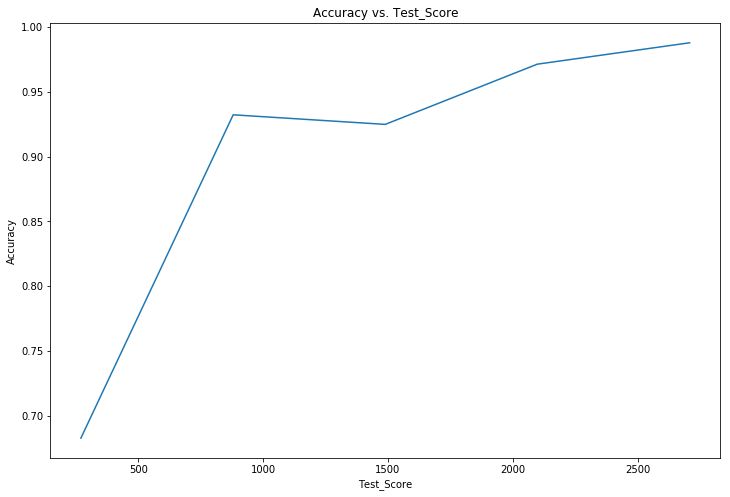

In [46]:
from sklearn.model_selection import learning_curve
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train_res,y_train_res,cv=5,n_jobs=-1)
size=lc[0]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,test_score)
plt.title('Accuracy vs. Test_Score')
plt.xlabel('Test_Score')
plt.ylabel('Accuracy')

** Finally, we can see that by sampling the target class,  the accuracy is increased by 98% which is not much increase from the    actual data.**

** Therefore, the best model is Random Forest Classifier with the following parameters.**

**RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6)**